In [40]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras.layers import BatchNormalization

Ejercicio de regresión. Aqui predecimos el comportamiento de una onda sinusoidal

Epoch 1/100
20/20 [==============================] - 3s 96ms/step - loss: 2.7288 - mse: 2.7288 - val_loss: 10.8452 - val_mse: 10.8452
Epoch 2/100
20/20 [==============================] - 2s 89ms/step - loss: 2.2405 - mse: 2.2405 - val_loss: 4.9393 - val_mse: 4.9393
Epoch 3/100
20/20 [==============================] - 2s 88ms/step - loss: 1.9328 - mse: 1.9328 - val_loss: 1.4645 - val_mse: 1.4645
Epoch 4/100
20/20 [==============================] - 2s 89ms/step - loss: 1.6511 - mse: 1.6511 - val_loss: 0.7114 - val_mse: 0.7114
Epoch 5/100
20/20 [==============================] - 2s 88ms/step - loss: 1.4873 - mse: 1.4873 - val_loss: 0.4908 - val_mse: 0.4908
Epoch 6/100
20/20 [==============================] - 2s 89ms/step - loss: 1.3361 - mse: 1.3361 - val_loss: 0.5114 - val_mse: 0.5114
Epoch 7/100
20/20 [==============================] - 2s 89ms/step - loss: 1.2476 - mse: 1.2476 - val_loss: 0.5054 - val_mse: 0.5054
Epoch 8/100
20/20 [==============================] - 2s 88ms/step - loss: 

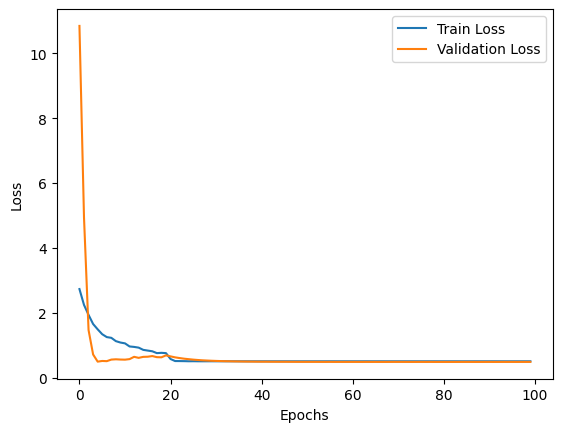

7/7 [==============================] - 0s 17ms/step


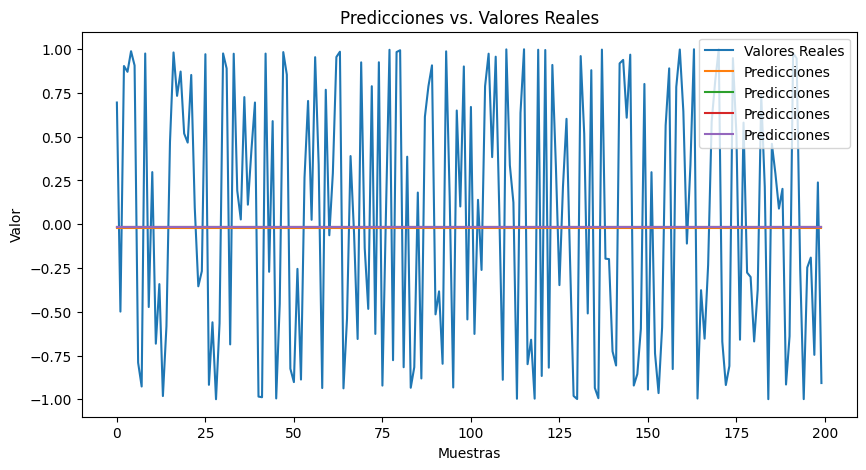

In [43]:
# Genera datos de ejemplo para regresión
num_samples = 1000
input_shape = (5000, 1)  # Longitud de la secuencia
output_shape = 1  # Salida unidimensional

# Genera datos de entrada aleatorios en forma de onda sinusoidal
X = np.random.rand(num_samples, *input_shape) * 2 - 1  # Es una lista con 1000 elementos, donde cada elemento tiene 100 elementos con valores entre -1y1
y = np.sin(2 * np.pi * np.sum(X, axis=1)).reshape(-1, 1)  # Salida es una onda sinusoidal. Es una lista con 1000 elementos.
#X sera en realidad una lista con N espectros, donde cada posición n tiene el flujo de cada espectro.
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)












model = Sequential()

model.add(Conv1D(filters=64, kernel_size=15, activation='relu', strides=2, input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=128, kernel_size=15, activation='relu', strides=2))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=256, kernel_size=15, activation='relu', strides=2))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=256, kernel_size=15, activation='relu', strides=2))
model.add(MaxPooling1D(pool_size=3))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))## considerar tanh
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_shape, activation='linear'))  # Capa de salida lineal para regresión, output_shape debe ser =1

# Compila el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse']) ## considerar el mae y huber.

# Entrena el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)



# Evalúa el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error (MSE) or loss:", loss)
print(f'Accuracy: {accuracy * 100:.2f}%')

#Visualización del Rendimiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Visualizar las predicciones y los valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Valores Reales")
plt.plot(predictions, label="Predicciones")
plt.legend()
plt.title("Predicciones vs. Valores Reales")
plt.xlabel("Muestras")
plt.ylabel("Valor")
plt.show()



Ejercicio de clasifiación

Epoch 1/100
20/20 [==============================] - 3s 95ms/step - loss: 1.6790 - accuracy: 0.3187 - val_loss: 2.8593 - val_accuracy: 0.2812
Epoch 2/100
20/20 [==============================] - 2s 92ms/step - loss: 1.5211 - accuracy: 0.3625 - val_loss: 3.1379 - val_accuracy: 0.2812
Epoch 3/100
20/20 [==============================] - 2s 90ms/step - loss: 1.4949 - accuracy: 0.3625 - val_loss: 1.6935 - val_accuracy: 0.2812
Epoch 4/100
20/20 [==============================] - 2s 91ms/step - loss: 1.4307 - accuracy: 0.3641 - val_loss: 1.2792 - val_accuracy: 0.2812
Epoch 5/100
20/20 [==============================] - 2s 91ms/step - loss: 1.4421 - accuracy: 0.3500 - val_loss: 1.1524 - val_accuracy: 0.2750
Epoch 6/100
20/20 [==============================] - 2s 90ms/step - loss: 1.4026 - accuracy: 0.3359 - val_loss: 1.1068 - val_accuracy: 0.2812
Epoch 7/100
20/20 [==============================] - 2s 89ms/step - loss: 1.3798 - accuracy: 0.3453 - val_loss: 1.1443 - val_accuracy: 0.3063
Epoch 

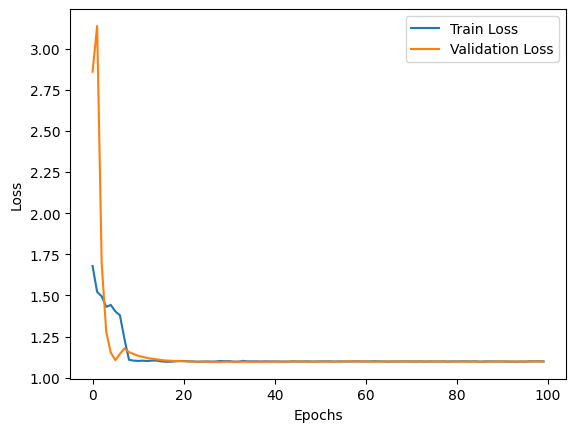

7/7 [==============================] - 0s 17ms/step
Predicción: 2 Etiqueta Real: 2
Predicción: 2 Etiqueta Real: 2
Predicción: 2 Etiqueta Real: 0
Predicción: 2 Etiqueta Real: 0
Predicción: 2 Etiqueta Real: 1
Predicción: 2 Etiqueta Real: 0
Predicción: 2 Etiqueta Real: 2
Predicción: 2 Etiqueta Real: 2
Predicción: 2 Etiqueta Real: 2
Predicción: 2 Etiqueta Real: 2


In [38]:
# Genera datos de ejemplo
num_samples = 1000 #numero de espectros
input_shape = (5000, 1)  # Longitud de la secuencia: Cantidad de datos de flujo
num_classes = 3  # Número de clases

X = np.random.rand(num_samples, *input_shape)  # Datos de entrada aleatorios. Lista de 1000 listas, en donde cada lista tiene 100 elementos
y = np.random.randint(num_classes, size=num_samples)  # Etiquetas. Sus valores son 0,1,2 por las tres clases y tiene 1000 elementos con estos valores.

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convierte las etiquetas a codificación one-hot
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)












# Crea el modelo de CNN
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=15, activation='relu', strides=2, input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=128, kernel_size=15, activation='relu', strides=2))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=256, kernel_size=15, activation='relu', strides=2))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=256, kernel_size=15, activation='relu', strides=2))
model.add(MaxPooling1D(pool_size=3))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrena el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evalúa el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss:", loss)
print(f'Accuracy: {accuracy * 100:.2f}%')


#Visualización del Rendimiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Convierte las predicciones one-hot a etiquetas
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Visualizar algunas predicciones y etiquetas reales
for i in range(10):
    print("Predicción:", predicted_labels[i], "Etiqueta Real:", true_labels[i])
